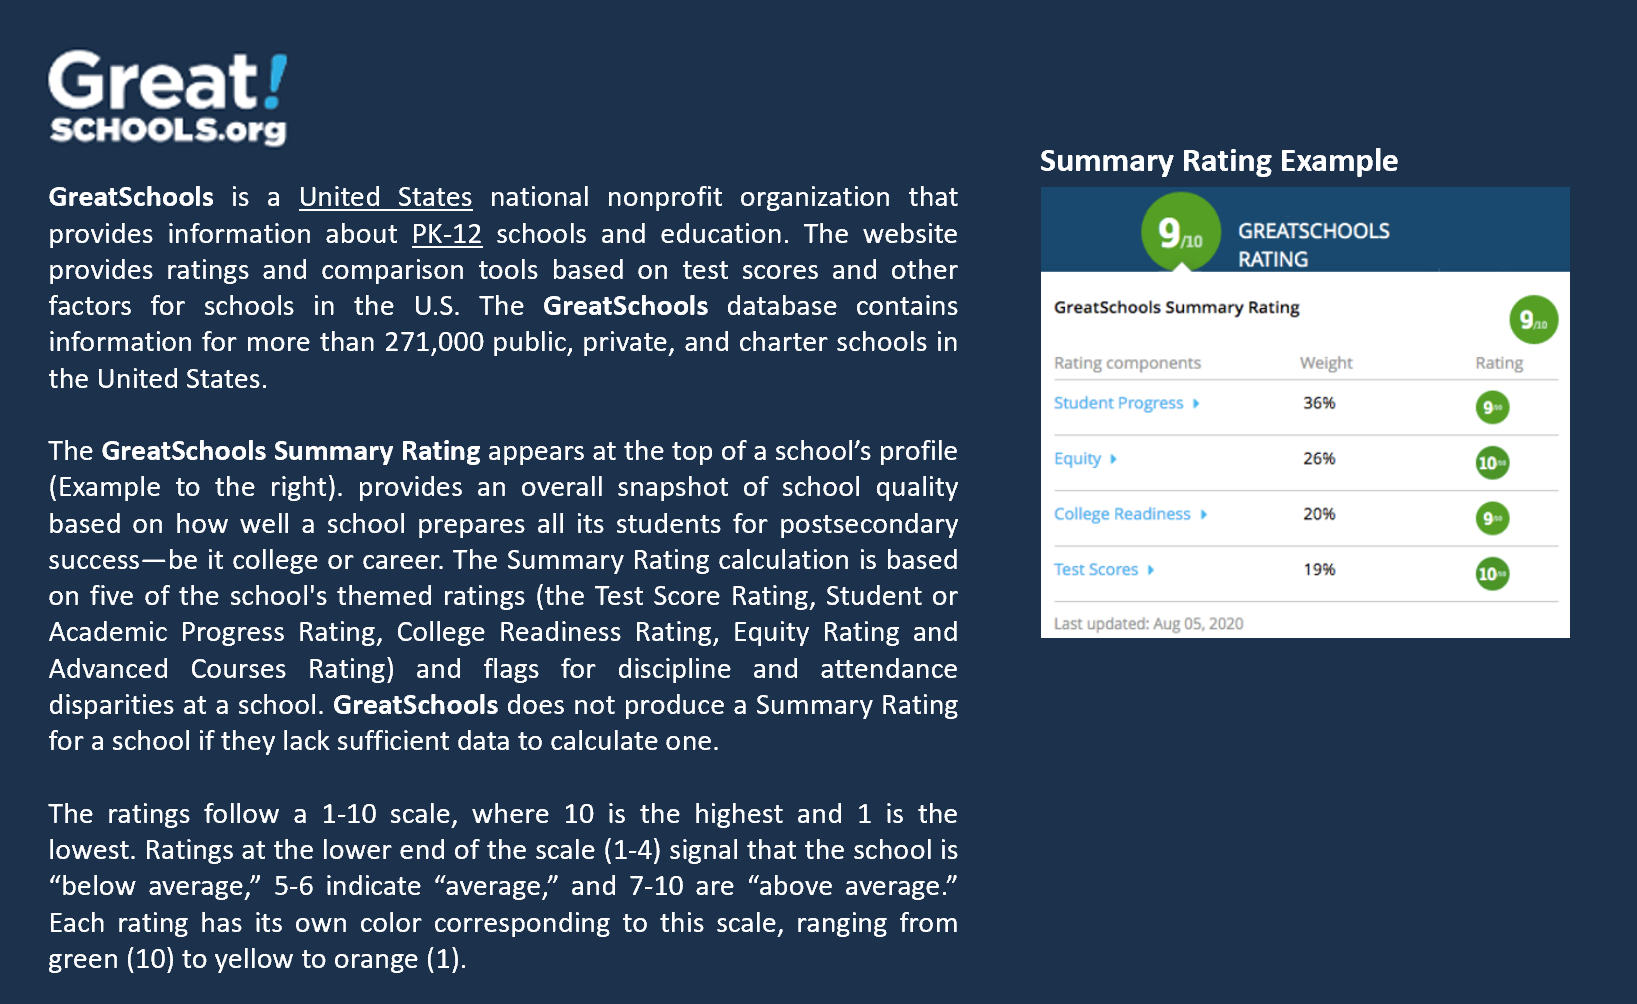


# Home Buyers Forego Garages for School Districts
   * 78 % of buyers in their preferred school district gave up home features to get there
   * Most common compromises include a garage, large backyard, and updated kitchen
   * Nearly three-quarters of respondents say good schools were important to their search
 
Today’s seller’s market is forcing buyers to make compromises, but new survey data (Source: http://wwww.realtor.com) shows buyers remain steadfast in their desire for their preferred good school districts. In fact, they are willing to give up two of their most desired home features — a garage and updated kitchen — to get into the right school district they want.

Most buyers understand that they may not be able to find a home that covers every single item on their wish list, but the survey shows that school districts are an area where many buyers aren’t willing to compromise. For many buyers and not just buyers with children, “location, location, location,” means “schools, schools, schools.”

The majority of successful buyers surveyed, 73 %, indicated that school boundaries were important to their search, with 39 % indicating very important and 34 % important. Only 18 % said they were unimportant or very unimportant, and 9 % of buyers were neutral on the question.

The desire for particular schools varied significantly by life stage and age. 91 % of buyers with children said that school boundaries were important or very important, compared to 34 % of those without children. Similarly, younger buyers were more likely to say that schools were important. 84 % of those 35-54 years old and 86 % of those 18-34 years old indicated they were important, compared to 37 % of buyers 55-plus. More than half of older buyers 55-plus said school boundaries were unimportant or very unimportant.

Good schools desire by 78 % of buyers makes ***GreatSchools*** the partner of choice for so many leading real estate websites (e.g., redfin, zillow, realtor) simply because ***GreatSchools*** are the nation’s leading source of school performance information and offer the most comprehensive set of school data available. Last year, ***GreatSchools*** had more than 55 million unique visitors, including over half of American families with school-age children.

***“Many families come to GreatSchools for the first time because they are preparing to move to a new neighborhood or community,” said Bill Jackson, Founder and CEO of GreatSchools. “Parents are looking for a neighborhood with great school options for their kids, and partnering with Zillow helps GreatSchools bring families more and better info about the whole neighborhood, including nearby homes.”***




# For Predicting House Prices Capstone Project, We'll be using The GreatSchools API to return all the schools information in the 49 selected cities in North California:
   * After reaching out to ***GreatSchools.Org***, Thankfully they helped me to set up a ***FREE API trial key*** for the period of this poject.
   * The GreatSchools API is a REST-based web service.
   * For this project, we'll use the API to return all ***public*** School information per city as shown below: 
   
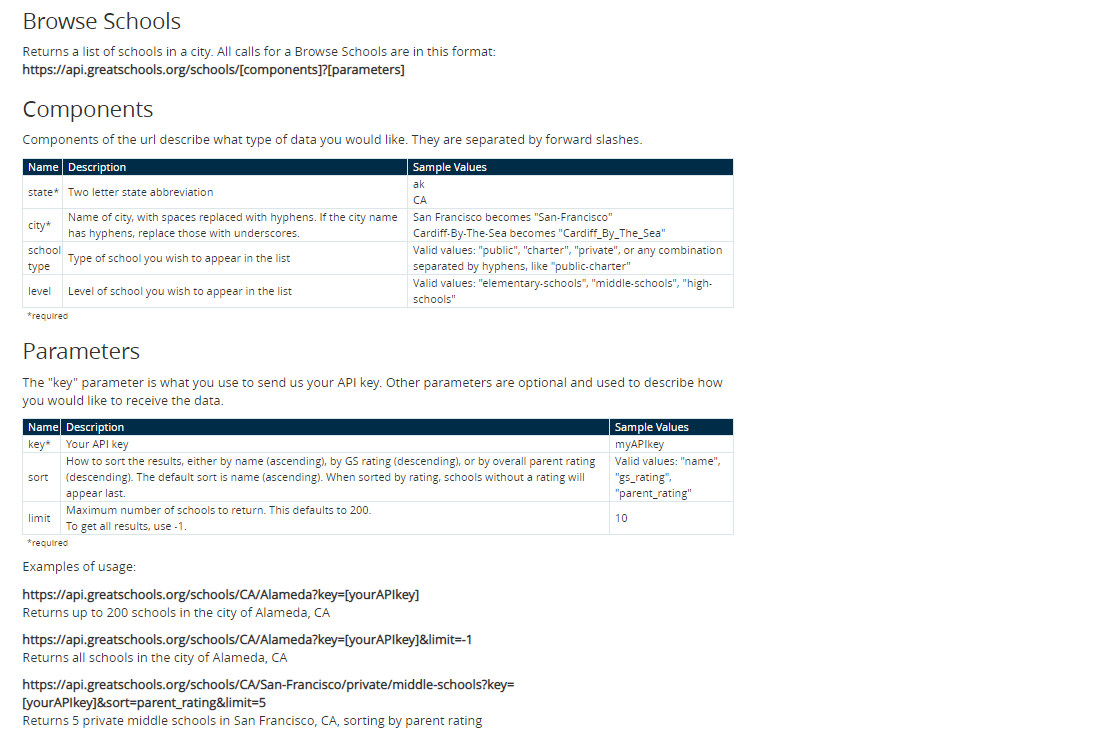
   
      

In [1]:
# First, import the relevant modules:
import requests
import pandas as pd
import os

# This is needed so we can save the output from the xml (GreatSchools API) as a Pandas DF:
from sb_utils import save_file

# The xml.etree.ElementTree module implements a simple and efficient API for parsing and creating XML data:
import xml.etree.ElementTree as ET

# let's import glob package so we can import all API output csv files into one DataFrame:
import glob

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [3]:
# Keeping the default settings and only changing the width of the current notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# Now, call the GreatSchools API and pull out the desired school features for only one city "Dublin, CA"
# Please note the API parameters: sort per parent_rating, limit -1 means pull all possible results "Schools per city"
# and whether the schools are public or private: 
url = "https://api.greatschools.org/schools/CA/Dublin/public?key=[API-Key]&sort=parent_rating&limit=-1"

In [5]:
# Inspect the output API structure of the object you created, and take note of how it's structured:
response = requests.get(url)
print(response.ok)

True


In [6]:
# text output is xml:
print(response.text)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><schools><school><gsId>17572</gsId><name>John Green Elementary School</name><type>public</type><gradeRange>K-5</gradeRange><enrollment>859</enrollment><gsRating>10</gsRating><parentRating>5</parentRating><city>Dublin</city><state>CA</state><districtId>6</districtId><district>Dublin Unified School District</district><districtNCESId>0600019</districtNCESId><address>3300 Antone Way, 
Dublin, CA  94568</address><phone>(925) 833-4200</phone><fax>(925) 829-1076</fax><website>www.dublinusd.org</website><ncesId>060001912078</ncesId><lat>37.7181</lat><lon>-121.8615</lon><overviewLink>https://www.greatschools.org/california/dublin/17572-John-Green-Elementary-School/?utm_source=GSAPI&amp;utm_medium=referral</overviewLink><ratingsLink>https://www.greatschools.org/california/dublin/17572-John-Green-Elementary-School/?utm_source=GSAPI&amp;utm_medium=referral</ratingsLink><reviewsLink>https://www.greatschools.org/california/dublin/17572-John-Gree

In [7]:
print(type(response.text))

<class 'str'>


In [8]:
# when using xml.etree.ElementTree with requests, we should use fromstring().
# fromstring() parses XML from a string directly into an Element, which is the root element of the parsed tree.
# As shown above response.text returns a string, and xml.etree.ElementTree.parse is for files:
root = ET.fromstring(response.text)

In [9]:
# Now let's create an element object as the root (no more tree). 
#So to write it back out, let's make it a tree:
tree = ET.ElementTree(root)

#Writing our input xml file:
tree.write("Dublin.xml")

In [10]:
# let's understand the xml structure.
# First let's read in the file with ElementTree:
xtree = ET.parse("Dublin.xml")
xroot = xtree.getroot()


In [11]:
# Now that we have initialized the tree, let's look at the XML and print out values 
#in order to understand how the tree is structured:
#As an Element, root has a tag and a dictionary of attributes
xroot.tag

'schools'

In [12]:
xroot.attrib

{}

In [13]:
#It also has children nodes over which we can iterate:
for child in xroot:
    print(child.tag, child.attrib)

school {}
school {}
school {}
school {}
school {}
school {}
school {}
school {}
school {}
school {}
school {}
school {}
school {}


In [14]:
#Children are nested, and we can access specific child nodes by index:
xroot[0][1].text

'John Green Elementary School'

In [15]:
def parse_XML(xml_file, df_cols): 
    
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = ET.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        #In order to get the name attribute, we use the attrib.get() function:    
        res.append(node.attrib.get(df_cols[0]))
        for element in df_cols[1:]: 
            #The text content of each element can be retrieved using the find() function of nodes.
            if node is not None and node.find(element) is not None:
                res.append(node.find(element).text)
            else: 
                res.append(None)
        # dict comprehension, where a dictionary in the form column name: node value is created,
        # and added to the list of rows. These will finally be used to create the complete dataframe.
        rows.append({df_cols[i]: res[i] for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [16]:
# From looking at the xml file, we can determine which columns/attribute/fields we're interested on: 
df_cols = ["gsId", "name", "type", "gradeRange", "enrollment", "gsRating", "parentRating", "city", "state", "districtId", "district", "districtNCESId", "address", "phone", "fax", "website", "ncesId", "lat", "lon"]

In [17]:
# let's call parse_XML function using xml with the desired school information (df_cols) and safe output: Dublin_df
Dublin_df = parse_XML("Dublin.xml", df_cols)

In [18]:
# df shape:
Dublin_df.shape

(13, 19)

In [19]:
# calling the final DataFrame: Dublin_df
Dublin_df

,gsId,name,type,gradeRange,enrollment,gsRating,parentRating,city,state,districtId,district,districtNCESId,address,phone,fax,website,ncesId,lat,lon
0,None,John Green Elementary School,public,K-5,859,10,5,Dublin,CA,6,Dublin Unified School District,0600019,"3300 Antone Way, \nDublin, CA 94568",(925) 833-4200,(925) 829-1076,www.dublinusd.org,060001912078,37.7181,-121.8615
1,None,Dublin Elementary School,public,K-5,878,7,4,Dublin,CA,6,Dublin Unified School District,0600019,"7997 Vomac Road, \nDublin, CA 94568",(925) 833-1204,(925) 833-3362,www.dublinusd.org,060001906929,37.715023,-121.9365
2,None,Dublin High School,public,9-12,2978,9,4,Dublin,CA,6,Dublin Unified School District,0600019,"8151 Village Parkway, \nDublin, CA 94568",(925) 833-3300,(925) 833-3322,www.dublinusd.org,060001909273,37.720997,-121.92639
3,None,Frederiksen Elementary School,public,K-5,800,6,4,Dublin,CA,6,Dublin Unified School District,0600019,"7243 Tamarack Drive, \nDublin, CA 94568",(925) 828-1037,(925) 829-2562,www.dublinusd.org,060001909275,37.715076,-121.92195
4,None,Murray Elementary School,public,K-5,615,7,4,Dublin,CA,6,Dublin Unified School District,0600019,"8435 Davona Drive, \nDublin, CA 94568",(925) 828-2568,(925) 803-1367,www.dublinusd.org,060001909276,37.72154,-121.93298
5,None,Wells Middle School,public,6-8,996,6,4,Dublin,CA,6,Dublin Unified School District,0600019,"6800 Penn Drive, \nDublin, CA 94568",(925) 828-6227,(925) 829-8851,https://www.dublin.k12.ca.us/Domain/407,060001909278,37.712563,-121.9188
6,None,James Dougherty Elementary School,public,K-5,890,9,4,Dublin,CA,6,Dublin Unified School District,0600019,"5301 Hibernia Drive, \nDublin, CA 94568",(925) 803-4444,(925) 556-3488,www.dublinusd.org,060001908443,37.71039,-121.88512
7,None,Eleanor Murray Fallon School,public,6-8,1557,9,4,Dublin,CA,6,Dublin Unified School District,0600019,"3601 Kohnen Way, \nDublin, CA 94568",(925) 875-9376,(925) 829-7260,www.dublinusd.org,060001913169,37.71566,-121.86589
8,None,Harold William Kolb,public,K-5,735,9,4,Dublin,CA,6,Dublin Unified School District,0600019,"3150 Palermo Way, \nDublin, CA 94568",(925) 833-4720,(925) 833-4279,www.dublinusd.org,060001912927,37.71193,-121.8587
9,None,Valley High (Continuation) School,public,9-12,60,2,3,Dublin,CA,6,Dublin Unified School District,0600019,"6901 York Drive, \nDublin, CA 94568",(925) 829-4322,(925) 479-0342,www.dublinusd.org,060001909274,37.709167,-121.92118


In [20]:
# Finally, let's save the data to a new csv file:
datapath = 'C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Datasets'
save_file(Dublin_df, 'Dublin_df.csv', datapath)

Writing file.  "C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Datasets\Dublin_df.csv"


In [21]:
# let's read all cities exported from GreatSchools API from a directory into Pandas and concatenate them into one DataFrame (47 csv files):
# when below commands were executed we received an error //'utf-8' codec can't decode byte 0xcc in position 1: invalid continuation byte//
# we managed to get around that by adding an argument encoding='ISO-8859-1', So it seems our Python source file is actually encoded in ISO-8859-1, 
#but the Python interpreter for some reason assumes it to be encoded in UTF-8.
path = r'C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Datasets/GreatSchools_API' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

GreatSchools_NCA_df = pd.concat(li, axis=0, ignore_index=True)

In [22]:
import chardet
with open('C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Datasets/GreatSchools_API/San_ramon_df.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [23]:
# After adding an argument encoding='ISO-8859-1', there's no UnicodeDecodeError:
path = r'C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Datasets/GreatSchools_API' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, encoding='ISO-8859-1', index_col=None, header=0)
    li.append(df)

GreatSchools_NCA_df = pd.concat(li, axis=0, ignore_index=True)

In [24]:
GreatSchools_NCA_df.shape

(824, 19)

In [25]:
GreatSchools_NCA_df.head()

,gsId,name,type,gradeRange,enrollment,gsRating,parentRating,city,state,districtId,district,districtNCESId,address,phone,fax,website,ncesId,lat,lon
0,NaN,Bay Farm,public,K-8,610.0,9.0,5.0,Alameda,CA,1.0,Alameda Unified School District,601770.0,"200 Aughinbaugh Way, \nAlameda, CA 94502",(510) 748-4010,(510) 865-2194,http://bayfarm.alamedausd.ca.schoolloop.com,6.017700e+10,37.739000,-122.25195
1,NaN,Amelia Earhart Elementary School,public,K-5,651.0,10.0,5.0,Alameda,CA,1.0,Alameda Unified School District,601770.0,"400 Packet Landing Road, \nAlameda, CA 94502",(510) 748-4003,(510) 523-5837,http://earhart.alamedausd.ca.schoolloop.com,6.017700e+10,37.745290,-122.23928
2,NaN,Franklin Elementary School,public,K-5,335.0,8.0,5.0,Alameda,CA,1.0,Alameda Unified School District,601770.0,"1433 San Antonio Avenue, \nAlameda, CA 94501",(510) 748-4004,(510) 337-2439,http://franklin.alamedausd.ca.schoolloop.com,6.017700e+10,37.769035,-122.26160
3,NaN,Ruby Bridges Elementary School,public,K-5,484.0,3.0,5.0,Alameda,CA,1.0,Alameda Unified School District,601770.0,"351 Jack London Avenue, \nAlameda, CA 94501",(510) 748-4006,(510) 748-8314,http://rubybridges.alamedausd.ca.schoolloop.com/,6.017701e+10,37.781834,-122.28614
4,NaN,Maya Lin School,public,K-5,427.0,6.0,5.0,Alameda,CA,1.0,Alameda Unified School District,601770.0,"825 Taylor Street, \nAlameda, CA 94501",(510) 337-7007,(510) 523-8798,http://mls-alamedausd-ca.schoolloop.com,6.017701e+10,37.772724,-122.27189


In [26]:
# Alright, now let's save the final df GreatSchools_NCA_df containing all desired cities:
datapath = 'C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Datasets'
save_file(GreatSchools_NCA_df, 'GreatSchools_NCA_df.csv', datapath)

Writing file.  "C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Datasets\GreatSchools_NCA_df.csv"


In [27]:
# Let's import plotly so we can evaluate the variation in GreatSchool Rating among all schools in the selected 47 cities in North California:
import plotly.express as px

In [52]:
#As we can see below, the GS Rating is really distrobuted very well across all the 47 cities which hopefully this will be translated into a very important feature:
fig = px.box(GreatSchools_NCA_df, x='city', y='gsRating', color="city", title="Great Schools Rating in North California")
fig.show()